In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
medical_df = pd.read_csv('insurance.csv')

In [6]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
medical_df.shape

(1338, 7)

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 300x300 with 0 Axes>

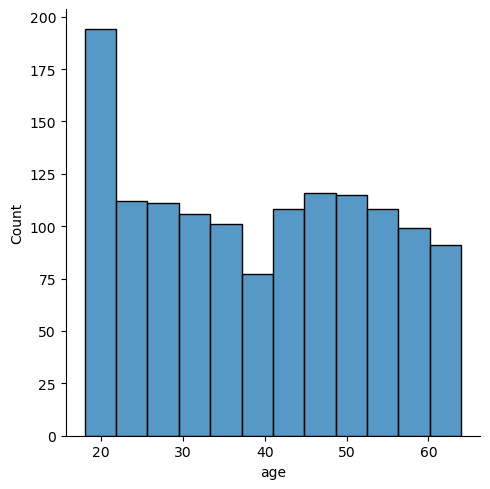

In [10]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 300x300 with 0 Axes>

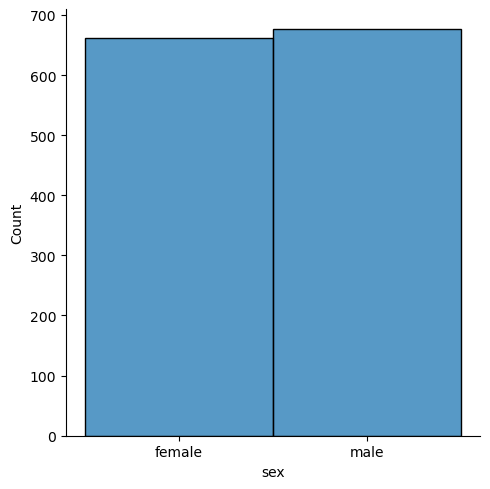

In [11]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [12]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

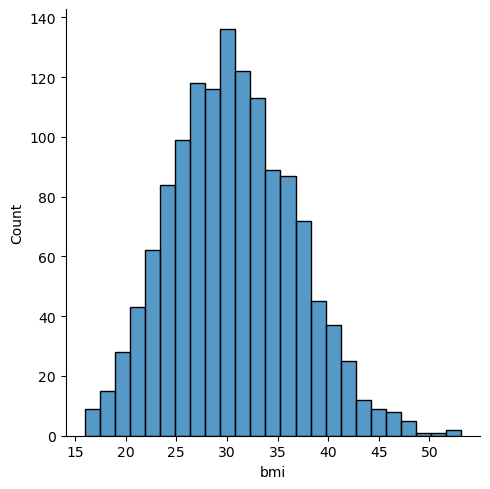

In [13]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [14]:
medical_df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

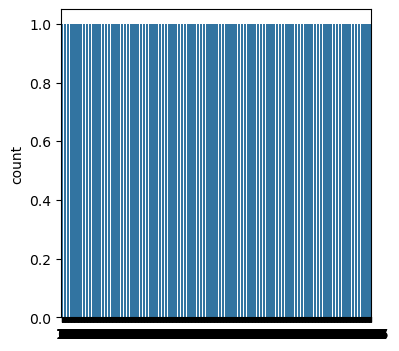

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(medical_df['children'])
plt.show()

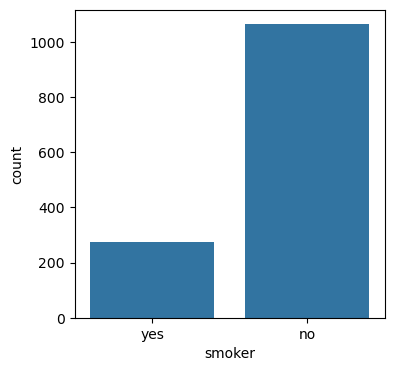

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

In [19]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [22]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [23]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [25]:
X_train.shape

(1204, 6)

In [26]:
X_test.shape

(134, 6)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# create instances of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Bagging': BaggingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

# training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(f"{name} R2 Score = {r2_score(y_test, ypred):.4f}")
    print(f"{name} RMSE = {np.sqrt(mean_squared_error(y_test, ypred))}")
    print("=" * 60)


Linear Regression R2 Score = 0.7059
Linear Regression RMSE = 5806.643593680346
Ridge Regression R2 Score = 0.7065
Ridge Regression RMSE = 5800.988697872384
Lasso Regression R2 Score = 0.7060
Lasso Regression RMSE = 5805.986797188416
Support Vector Regressor R2 Score = -0.0442
Support Vector Regressor RMSE = 10941.53512715071
Decision Tree R2 Score = 0.6166
Decision Tree RMSE = 6629.475408398869
Extra Trees R2 Score = 0.5498
Extra Trees RMSE = 7184.2874690302415
Random Forest R2 Score = 0.7508
Random Forest RMSE = 5345.249518302996
Bagging R2 Score = 0.7464
Bagging RMSE = 5391.5968562832095
AdaBoost R2 Score = 0.7593
AdaBoost RMSE = 5253.011547117788
Gradient Boosting R2 Score = 0.8010
Gradient Boosting RMSE = 4775.83790752085


In [38]:
from sklearn.metrics import accuracy_score

# Instantiate the model
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
ypred = gbr.predict(X_test)

r2 = r2_score(y_test, ypred)
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse

4779.356392550692